# Binomial distribution: simulating dice throws

### Sampling of dice values: even and uneven probabilities


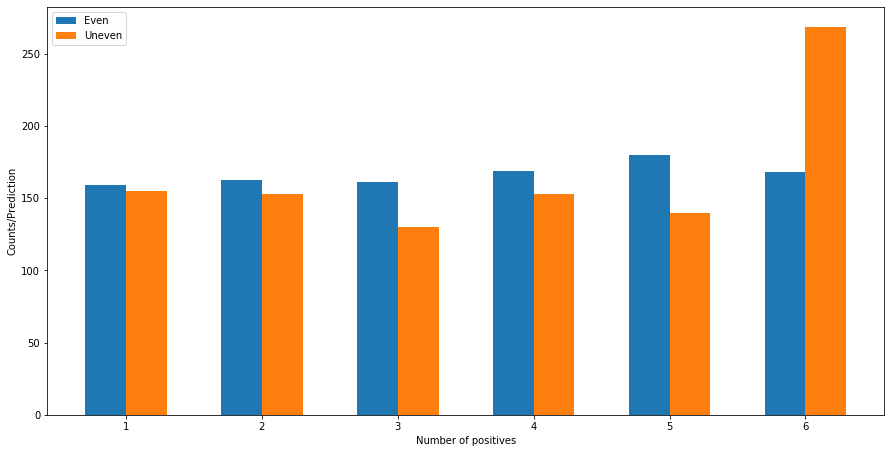

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scp 
import numpy as np

N = 1000

# Even probabilities
even = np.random.choice([1,2,3,4,5,6], size=N, replace=True, p=[1/6,1/6,1/6,1/6,1/6,1/6])

# Uneven probabilities
uneven = np.random.choice([1,2,3,4,5,6], size=N, replace=True, p=[1/7,1/7,1/7,1/7,1/7,2/7])

# Count instances of each value
valuesE, countsE = np.unique(even, return_counts=True) # Count instances of each value
valuesU, countsU = np.unique(uneven, return_counts=True) # Count instances of each value

# Plot results
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

plt.xlabel("Number of positives")
plt.ylabel("Counts/Prediction")
b1= plt.bar(values-0.15,countsE,width=0.3, label="Even")
b2= plt.bar(values+0.15,countsU,width=0.3, label="Uneven")
plt.legend()

### Combining several dice throws

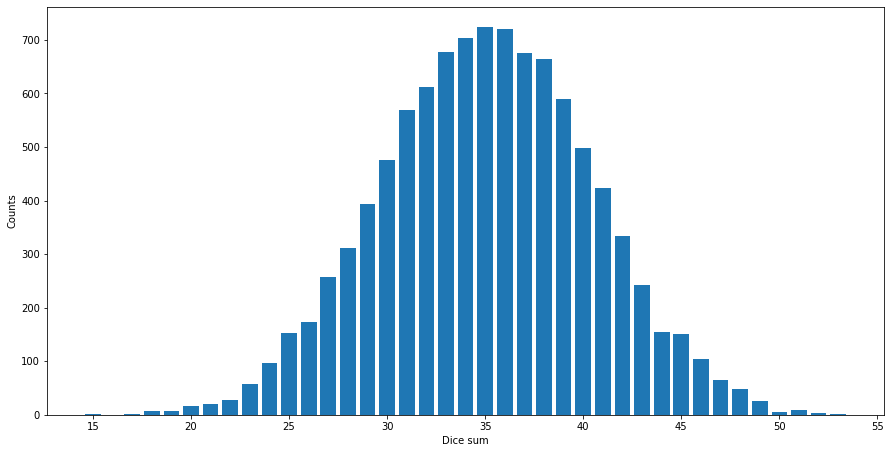

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scp 
import numpy as np

Nt = 10    # Number of dice throws
N = 10000  # Total of experiments

# Add Nt series of N dice throws
throws = np.zeros(N)
for i in range(Nt):
    t = np.random.choice([1,2,3,4,5,6], size=N, replace=True, p=[1/6,1/6,1/6,1/6,1/6,1/6])
    throws = np.add(throws,t)
    
# Count instances of each value
values, counts = np.unique(throws, return_counts=True) # Count instances of each value
    
# Plot results
fig = plt.figure(frameon=False)
fig.set_size_inches(15,7.5)

plt.xlabel("Dice sum")
plt.ylabel("Counts")
b= plt.bar(values,counts)

### Checking multiple dice throwing against the binomial distribution

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as scp 
import numpy as np
import pandas as pd

Nt = 2    # Number of dice throws
N = 100000  # Total of experiments

# Generate Nt series of N dice throws; can try even and uneven probabilities (unloaded and loaded dice)
series = pd.DataFrame()
for i in range(Nt):
#     series[i] = np.random.choice([1,2,3,4,5,6], size=N, replace=True, p=[1/6,1/6,1/6,1/6,1/6,1/6]) 
    series[i] = np.random.choice([1,2,3,4,5,6], size=N, replace=True, p=[10/61,10/61,10/61,11/61,10/61,10/61]) 

# Select subset with all throws equal to 4
for i in range(Nt):
    series= series[ (series[i]==4)]

# Parameters of the binomial distribution
Pside = 1/6 # Probability to get a given side
dist = scp.binom(Nt,Pside) # Binomial distribution (N,Pside)

# Compare observed ratio and predicted ratio
print("Throwing",Nt,"dices and getting all values equal to 4")
print("Observed ratio: {:7.5f}  Predicted ratio: {:7.5f}".format(len(series)/N,dist.pmf(Nt)) )
print("Observed counts: {:d}  Predicted counts: {:d}".format(len(series),int(N*dist.pmf(Nt)) ), "out of",N,"trials")

Throwing 2 dices and getting all values equal to 4
Observed ratio: 0.03296  Predicted ratio: 0.02778
Observed counts: 3296  Predicted counts: 2777 out of 100000 trials
